# 1.0 Basic Observation about the data
    - 1.1 Data types, shape, sample & Completeness of Data
    - 1.2 Null and duplicate rows
    - 1.3 Dropping non useful columns for modeling & analysis


In [1]:
# normal packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set column and row display lengths in jupyter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Sklearn general packages 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, make_scorer, precision_score, f1_score

# load data
data = pd.read_csv('Loan_Modelling.csv')

In [2]:
print(data.info()); display(data.sample(6));print(f'Null values  {data.isna().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1392,1393,47,23,33,90095,1,1.0,1,0,0,0,0,1,1
3988,3989,59,35,85,91330,1,3.4,3,0,1,0,1,0,1
2143,2144,56,31,65,92093,3,1.7,1,109,0,0,0,0,0
2823,2824,33,7,21,90095,1,0.6,3,0,0,1,0,0,0
3330,3331,34,9,32,95054,4,1.1,3,0,0,0,0,1,0
334,335,48,23,45,95053,1,1.3,2,0,0,0,0,1,0


Null values  ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [3]:
# there are no null values in any column
# now let's check whether there are any duplicate rows in the dataset
print(f'No of duplicated rows {data.duplicated().sum()}')

No of duplicated rows 0


## General Observation about the data
    - No missing (null) values 
    - total 5000 rows
    - No duplicated rows
    - Total 14 cols, all numerical, no categorical
    - CCAvg, Income, Mortgage are scaled down (by 1000)

# 2.0 Data Preprocessing (before EDA)

- 2.1 Dropping non useful columns for modeling & analysis
- 2.2 Scale correction
- 2.3 Copying data for Logistic Regression and Decision Tree

In [4]:
# drop ID, ZIPCode 
data.drop(['ID', 'ZIPCode'], axis = 1, inplace = True)

In [5]:
# column Income, CCAvg, Mortgage are provided in thousand dollars
# converting them to dollars for fair comparision with other numerical features

def mult_thousand(X):
    return X*1000

In [6]:
col_for_thousand = ['Income', 'CCAvg', 'Mortgage']
for idx, val in enumerate(col_for_thousand):
    data[val]= data[val].map(mult_thousand)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [8]:
# lets check the duplicated rows again
print(f'No of duplicated rows {data.duplicated().sum()}')

No of duplicated rows 13


In [9]:
# after deleting ID, Zipcode some rows are now duplicated
# lets delete those duplicated rows as well
data.drop_duplicates(inplace = True)

In [10]:
# Copy data for logistic regression and decision tree
df = data.copy() # for logistic regression
df_dt = data.copy() # for decision tree

# 3.0 Exploratory Data Analysis (EDA)
	3.1 Univariate and bivariate
    3.2 Feature Engineering	
    3.3 Insights based on EDA

In [11]:
# start with df.info() & df.sample() once again
df.info(); df.sample(8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4987 non-null   int64  
 1   Experience          4987 non-null   int64  
 2   Income              4987 non-null   int64  
 3   Family              4987 non-null   int64  
 4   CCAvg               4987 non-null   float64
 5   Education           4987 non-null   int64  
 6   Mortgage            4987 non-null   int64  
 7   Personal_Loan       4987 non-null   int64  
 8   Securities_Account  4987 non-null   int64  
 9   CD_Account          4987 non-null   int64  
 10  Online              4987 non-null   int64  
 11  CreditCard          4987 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 506.5 KB


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3018,58,32,49000,1,1400.0,1,99000,0,0,0,1,1
4005,56,32,32000,2,800.0,1,79000,0,1,0,1,0
3756,35,11,83000,2,2200.0,1,0,0,0,0,0,0
1648,47,21,85000,2,1700.0,2,0,0,0,0,0,1
4930,63,38,110000,3,1800.0,2,109000,0,0,0,1,0
1824,49,23,194000,4,8300.0,2,0,1,0,0,0,1
2039,51,25,32000,2,400.0,3,0,0,0,0,1,0
3819,57,27,50000,4,2000.0,3,0,0,0,0,1,0


In [12]:
# lets check those variables, which even though are numerical in the dataset but seem categorical. 
# Lets check what unique values they take
# lets also include Family and Education to for this investigation for they also seem to have only few values

cat_cols = df.iloc[:,-5:].columns.tolist()
cat_cols.extend(['Family', 'Education']) # Since Family Education seems like categorical
cat_cols.remove('Personal_Loan')  
# we don't want to investigate anything on Personal_Loan yet, since that is dependent variable

print(cat_cols)

['Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Family', 'Education']


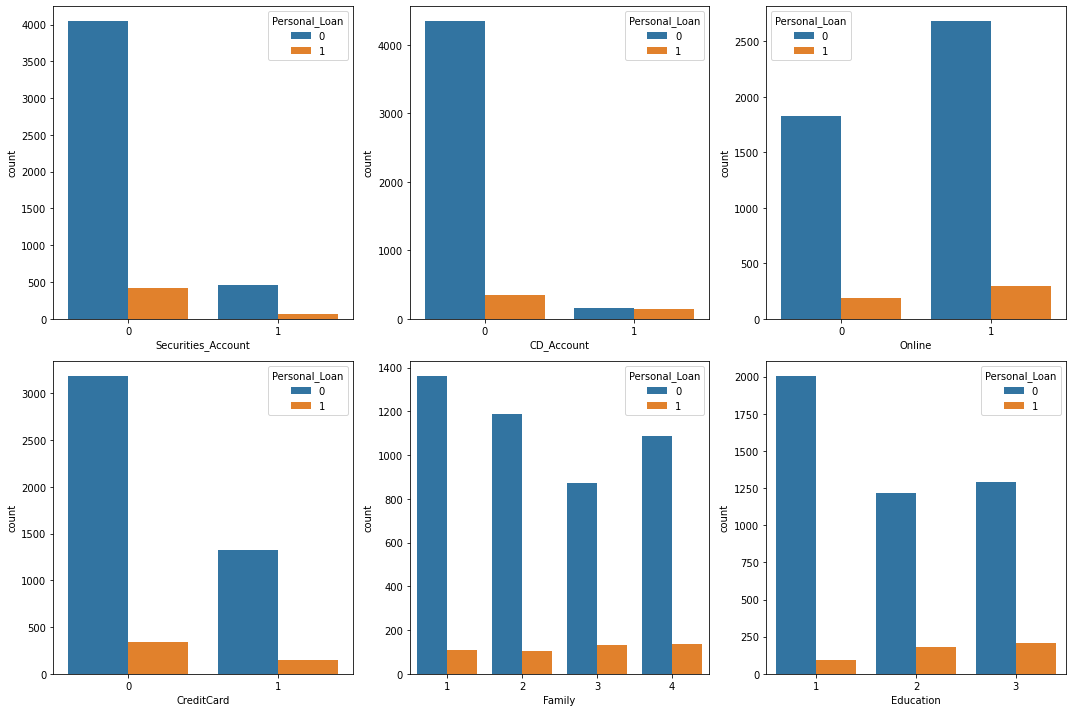

In [13]:
# lets perform mainly the univariate analysis for those variables now, 
# but we'll use value counts by countplot for those variables, with hue Personal_Loan
ncols = 3; nrows = 2
fig, ax = plt.subplots(ncols = ncols, nrows =nrows, figsize = (15,10))

for ind, x in enumerate(cat_cols):
        i = ind//ncols; j = ind%ncols
        sns.countplot(x = x, data = df, hue = 'Personal_Loan', ax = ax[i,j])
        #sns.histplot(x = x, data = df, kde = True, ax = ax[i,j] )

plt.tight_layout()
plt.show()

### Observation 
- indeed, most of them take only two values ( 0 & 1)
- Family and Education also have very few unique values

### Action
- We'll convert those variables (incl. Family & Education) to Category for the purpose of One hot Encoding
using Pandas dummy variable for building Logistic Regression Model

In [14]:
# let's convert those variables to categorical only for logistic regression purpose

for idx, val in enumerate(cat_cols):
    df[val] = df[val].astype('category')


In [15]:
# check the types of columns of the data frame once more
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4987 non-null   int64   
 1   Experience          4987 non-null   int64   
 2   Income              4987 non-null   int64   
 3   Family              4987 non-null   category
 4   CCAvg               4987 non-null   float64 
 5   Education           4987 non-null   category
 6   Mortgage            4987 non-null   int64   
 7   Personal_Loan       4987 non-null   int64   
 8   Securities_Account  4987 non-null   category
 9   CD_Account          4987 non-null   category
 10  Online              4987 non-null   category
 11  CreditCard          4987 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 431.8 KB


In [16]:
# Lets check the numerical columns now
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,4987.0,45.347704,11.460838,23.0,35.0,45.0,55.0,67.0
Experience,4987.0,20.114498,11.464902,-3.0,10.0,20.0,30.0,43.0
Income,4987.0,73824.543814,46062.727501,8000.0,39000.0,64000.0,98000.0,224000.0
CCAvg,4987.0,1940.629637,1748.823822,0.0,700.0,1500.0,2600.0,10000.0
Mortgage,4987.0,56646.079807,101805.340640,0.0,0.0,0.0,101000.0,635000.0
Personal_Loan,4987.0,0.096250,0.294964,0.0,0.0,0.0,0.0,1.0


## Observation
- Income, CCAvg, Mortgage are highly right skewed
- Age & Experience have mostly unskewed distribution
- 50 %, between 1st and 3rd quartile, of the customers fall into (35 - 55 yrs) of Age
- 50 %, between 1st and 3rd quartile, of the customers have Experience between 10 -30 Yrs

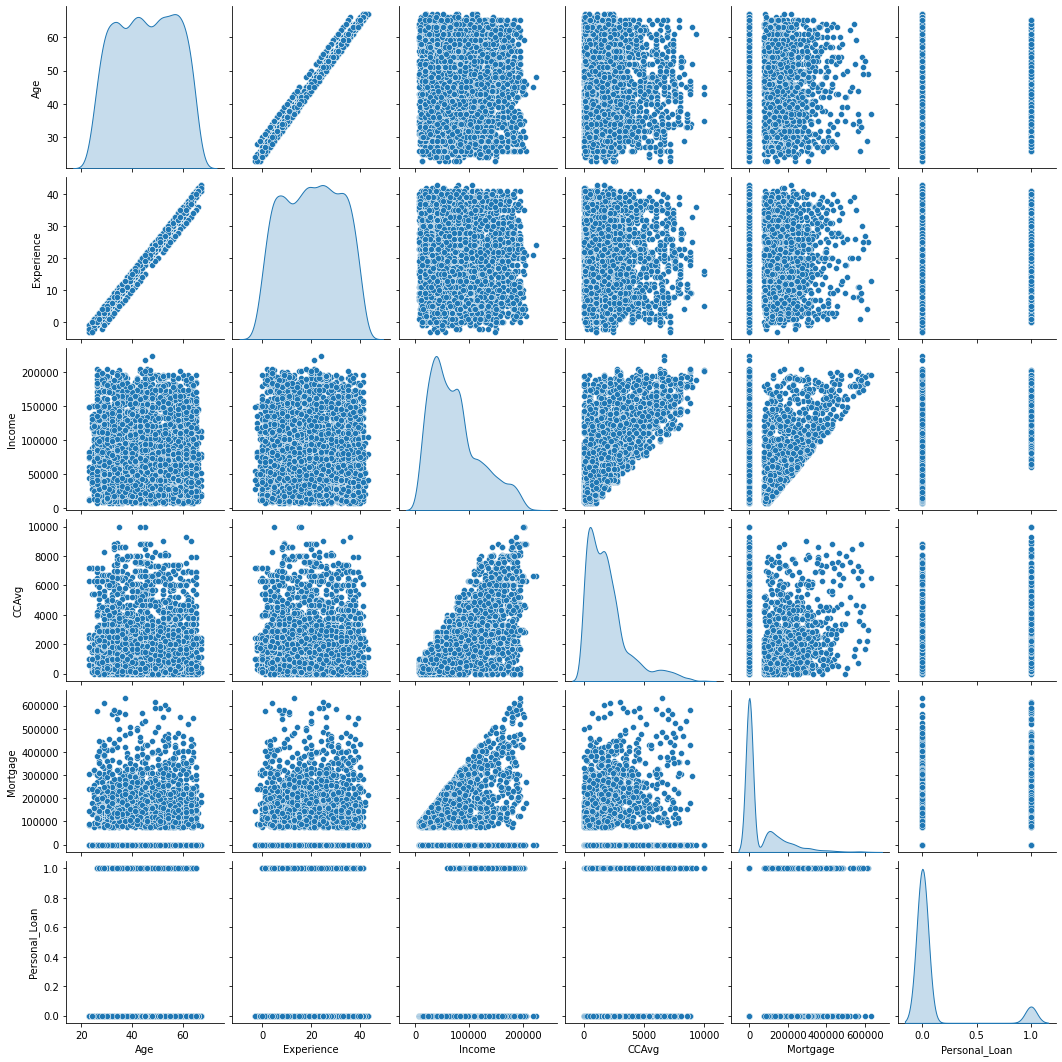

In [17]:
# quickly check the pair plot for univariate distribution & bivariate relationship
sns.pairplot(df, diag_kind = 'kde')

<AxesSubplot:>

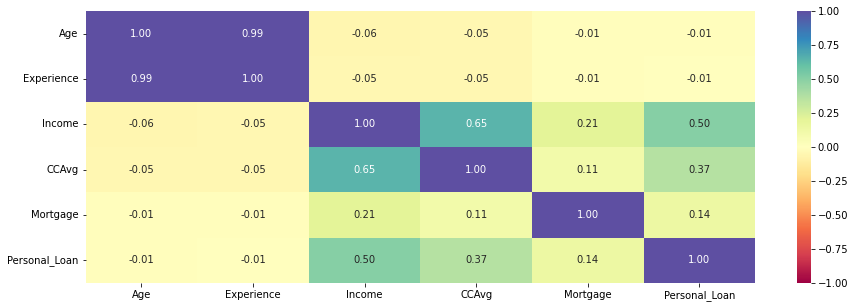

In [18]:
# and now heatmap to check correlation
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", vmin = -1, vmax = 1, cmap = "Spectral")

## Observation
- The following case of multi-colinarity that we observe
    - Age and Experience are extremely correlated (0.99)
    - CCAvg and Income are also correlated (0.65)

### Action
We will drop Experience & CCAvg columns from the dataset to remove multicollinearity which would otherwise adversely affect our logistic regression model

In [19]:
df = df.drop(['Experience', 'CCAvg'], axis = 1)

In [20]:
#check duplicates again, whether deleting columns brought case of duplicated rows
print(f'No of duplicated rows {df.duplicated().sum()}')

No of duplicated rows 22


In [21]:
# delete duplicate rows again
df.drop_duplicates(inplace = True)

In [22]:
# lets check df.info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4965 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4965 non-null   int64   
 1   Income              4965 non-null   int64   
 2   Family              4965 non-null   category
 3   Education           4965 non-null   category
 4   Mortgage            4965 non-null   int64   
 5   Personal_Loan       4965 non-null   int64   
 6   Securities_Account  4965 non-null   category
 7   CD_Account          4965 non-null   category
 8   Online              4965 non-null   category
 9   CreditCard          4965 non-null   category
dtypes: category(6), int64(4)
memory usage: 223.8 KB


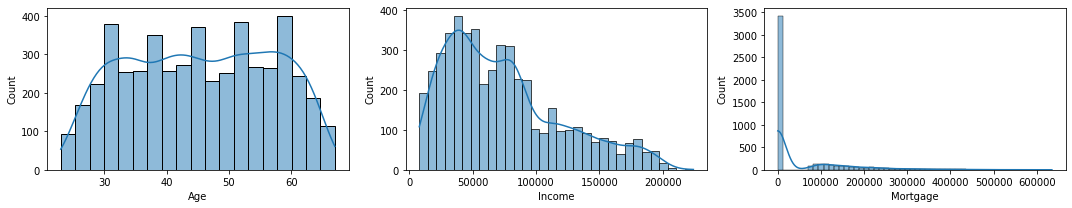

In [23]:
# let's dive deeper into the numerical columns ['Age', 'Income' , 'Mortgage'] and plot histogram
cols = ['Age', 'Income' , 'Mortgage'] 

ncols = 3; nrows = 1
fig, ax = plt.subplots(ncols = ncols, nrows =nrows, figsize = (15,3))

for ind, x in enumerate(cols):
        sns.histplot(x = x, data = df, kde = True, ax = ax[ind] )
        
plt.tight_layout()
plt.show()

### Observation

- There seems to be issue with scale as seen from above plots
- The range of Age seems to be much lower than those of Income + Mortgage

### Action
- We'll apply std scaler on all those variables for Logistic Regression model


In [24]:
# apply std scaler to cols = ['Age','Income' , 'Mortgage']
from sklearn.preprocessing import StandardScaler

df[cols] = StandardScaler().fit_transform(
    df[cols]
)


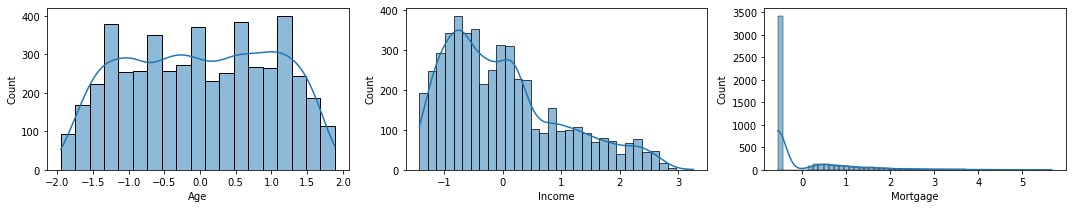

In [25]:
# now plotting histogram again

ncols = 3; nrows = 1
fig, ax = plt.subplots(ncols = ncols, nrows =nrows, figsize = (15,3))

for ind, x in enumerate(cols):
        sns.histplot(x = x, data = df, kde = True, ax = ax[ind] )
        
plt.tight_layout()
plt.show()

## 4.0  Model building - Logistic Regression


## 4.1 Logistic Regression - Data preparation & checking the split

In [26]:
# create dummy variables for categorical values for categorical columns
# drop the first dummy variable column
df = pd.get_dummies(df, columns = df.select_dtypes(include = 'category').columns, drop_first=True)

In [27]:
# build logistic regressionm model
X = df.drop('Personal_Loan',axis=1)     
y = df['Personal_Loan']   # Predicted class (Personal_Loan = 1=True/ Success, 0=False/ Not Success) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.head()

,Age,Income,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
702,-0.903003,0.762704,-0.558086,0,1,0,0,0,0,0,0,0
3119,1.363811,-0.430544,1.197670,0,1,0,0,1,0,0,1,0
2410,-1.426114,1.218308,-0.558086,1,0,0,0,0,0,0,0,1
3590,-1.164558,-0.213589,-0.558086,1,0,0,0,0,0,0,1,1
4724,-0.990188,-1.146492,-0.558086,0,0,1,0,0,0,0,0,0


In [28]:
print("Original Status True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 1]), (len(df.loc[df['Personal_Loan'] == 1])/len(df.index)) * 100))
print("Original Status False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 0]), (len(df.loc[df['Personal_Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Status True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Status False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Status True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Status False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Status True Values    : 480 (9.67%)
Original Status False Values   : 4485 (90.33%)

Training Status True Values    : 336 (9.67%)
Training Status False Values   : 3139 (90.33%)

Test Status True Values        : 144 (9.66%)
Test Status False Values       : 1346 (90.34%)



## 4.2 Building Logistic Regression Model

In [29]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0  0.055629  2.541984  0.07439 -0.248992  1.523363  1.230318  2.745909   

          7         8         9        10        11  intercept  
0  2.904619 -0.440113  2.874436 -0.577322 -0.660535   -6.10406  


In [30]:
# top  co-efficients, positively affecting the logistic regression Personal Loan classification prediction
X_train.iloc[:,[7, 9, 6,1,4]].head(3)  # using the results from pd.DataFrame(model.coef_)

,Education_3,CD_Account_1,Education_2,Income,Family_3
702,0,0,0,0.762704,1
3119,1,0,0,-0.430544,1
2410,0,0,0,1.218308,0


## Observation after building the Logistic Regression Model
- Since for logistic regression, we're measuring log (p/ (1-p)) [log of (odds probability of success), which is linearly related with the features, higher the co-efficients higher the sucess prediction
- Education is the top feature which most affects our logistic regression classification prediction positively
- Followed by CDAccount, Income, Family


## 4.3 Logistic Regression Model - Performance evaluation

In [31]:
# function to calculate recall score
def get_recall_score(model, threshold = None):
    
    if threshold == None:
        pred_train = model.predict(X_train)
        pred_test =  model.predict(X_test)
      
    else: 
        pred_train = np.where(model.predict_proba(X_train)[:,1] > threshold, 1, 0)
        pred_test =  np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
      
    print("Recall on training set : ", recall_score(y_train,pred_train))
    print("Recall on test set : ", recall_score(y_test,pred_test))
    
# function to calculate precision score
def get_precision_score(model, threshold = None):
    
    if threshold == None:
        pred_train = model.predict(X_train)
        pred_test =  model.predict(X_test)
      
    else: 
        pred_train = np.where(model.predict_proba(X_train)[:,1] > threshold, 1, 0)
        pred_test =  np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
 
    print("Precision on training set : ", precision_score(y_train,pred_train))
    print("Precision on test set : ", precision_score(y_test,pred_test))

# function to calculate f1 score
def get_f1_score(model, threshold = None):
  
    if threshold == None:
        pred_train = model.predict(X_train)
        pred_test =  model.predict(X_test)
       
    else: 
        pred_train = np.where(model.predict_proba(X_train)[:,1] > threshold, 1, 0)
        pred_test =  np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        
    print("f1_score on training set : ", f1_score(y_train,pred_train))
    print("f1_score on test set : ", f1_score(y_test,pred_test))
    

# function for confusion matrix
def conf_mat(model, X_test, y_test, threshold = None):
    
    if threshold == None:
        pred_test =  model.predict(X_test)
       
    else: 
        pred_test =  np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        print (f'threshold = {threshold}')
       
    cf = confusion_matrix(y_test, pred_test)
    categories = ['Zero', 'One']
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,6))
    sns.heatmap(cf, annot=labels, fmt=''
            ,xticklabels = categories
            ,yticklabels = categories
            ,cmap='Blues' 
           )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')


# function to retrieve TN, FP,FN, TP from confusion matrix
def conf_mat_tp_tn_fp_fn(model, X_test, y_test, threshold = None):
    
    if threshold == None:
        pred_test =  model.predict(X_test)
       
    else: 
        pred_test =  np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        
    cf = confusion_matrix(y_test, pred_test)
    TN = cf[0,0]; FP = cf[0,1]; FN = cf[1,0]; TP = cf[1,1] 
    return TN, FP, FN, TP

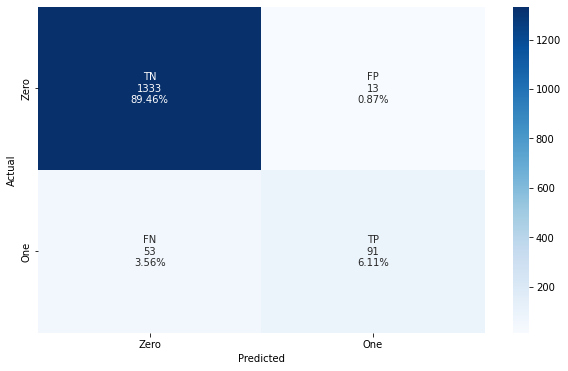

In [32]:
# lets plot the confirmation matrix for out of sample data on the created logistic regression model
conf_mat(model, X_test, y_test)

In [33]:
# print Accuracy
model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
print("Accuracy on training set:", model_score_train)
print("Accuracy on training set:", model_score_test)

Accuracy on training set: 0.9574100719424461
Accuracy on training set: 0.9557046979865772


In [34]:
# print recall for both train and test data
get_recall_score(model)

Recall on training set :  0.6517857142857143
Recall on test set :  0.6319444444444444


In [35]:
## print precision for both train and test data
get_precision_score(model)

Precision on training set :  0.876
Precision on test set :  0.875


In [36]:
## print f1 score for both train and test data
get_f1_score(model)

f1_score on training set :  0.7474402730375427
f1_score on test set :  0.7338709677419354


## Success Criteria based on Business Objective

- Optimize Simultaneously:
    {maximize TP (True Positive), minimize FP (False Positive)}
        - Most importantly, minimize FP. Minimize FP is most critical success criteria here
        - We can argue that the loss is much bigger for a bank when non deserving customers are identified as a candidate for Personal loan
        - of course, FN (False Negative) should also be checked since it represnts lost opportunity for bank
        
Overall, the objective is to find a model that minimizes FP with good TP (recall)

- For measuring FP, we shall use FPR (False Positive Rate = FP/ (TN+ FP), also FPR = 1- specificity
- Recall will be another measure that we'll search to achieve business objective
    

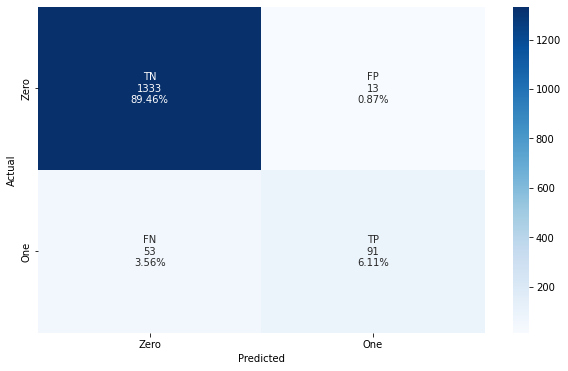

In [37]:
# lets plot the confirmation matrix once again to work out on our hypothesis
conf_mat(model, X_test, y_test)

## Observation

- As seen from above plot, lets investigate whether there is opportunity to reduce FP without degrading too much TP

## 4.4 Logistic Regression Model - Performance  improvement

In [38]:
# store the predicted probabilities for class 1
y_pred_prob = model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

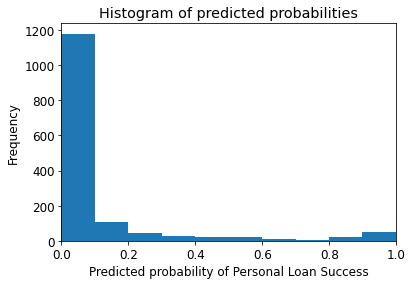

In [39]:
# histogram of predicted probabilities
plt.rcParams['font.size'] = 12
# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Personal Loan Success')
plt.ylabel('Frequency')

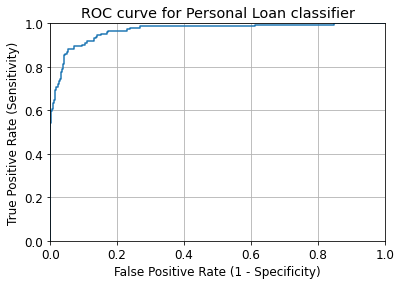

In [40]:
# plot the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Personal Loan classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [41]:
# define a function that accepts a threshold and prints Recall/ sensitivity and FPR
def evaluate_threshold(threshold):
    print('TPR/ Sensitivity/ Recall:', tpr[thresholds > threshold][-1])
    print('FPR/ or (1-Specificity):', fpr[thresholds > threshold][-1])

In [42]:
# varying the threshold from 0.1, 0.2 ...1.0, print out the TPR (Recall) & its corresponding FPR for each 
# threshold from the ROC Curve
for x in np.arange(0.1, 1.1, 0.1):
    print("*"*50)
    print(f'threshold = {x}')
    evaluate_threshold(x)

**************************************************
threshold = 0.1
TPR/ Sensitivity/ Recall: 0.9305555555555556
FPR/ or (1-Specificity): 0.13075780089153047
**************************************************
threshold = 0.2
TPR/ Sensitivity/ Recall: 0.8819444444444444
FPR/ or (1-Specificity): 0.05274888558692422
**************************************************
threshold = 0.30000000000000004
TPR/ Sensitivity/ Recall: 0.7777777777777778
FPR/ or (1-Specificity): 0.031203566121842496
**************************************************
threshold = 0.4
TPR/ Sensitivity/ Recall: 0.7083333333333334
FPR/ or (1-Specificity): 0.017830609212481426
**************************************************
threshold = 0.5
TPR/ Sensitivity/ Recall: 0.6319444444444444
FPR/ or (1-Specificity): 0.008915304606240713
**************************************************
threshold = 0.6
TPR/ Sensitivity/ Recall: 0.5416666666666666
FPR/ or (1-Specificity): 0.0029717682020802376
*************************************

## Observation
- from above calculation, we see that from threshold = 0.6, the FPR already start to converge at 0, while TPR is still substantial (0.54)
- when threshold > 0.6, the TPR starts to degarde and converge to Zero as well
- therefore, we will use the threshold = 0.6


In [43]:
# predict Personal Loan success if the predicted probability is greater than 0.6

get_recall_score(model, threshold = 0.6); get_precision_score(model, threshold = 0.6);get_f1_score(model, threshold = 0.6)

Recall on training set :  0.6190476190476191
Recall on test set :  0.5625
Precision on training set :  0.9454545454545454
Precision on test set :  0.9529411764705882
f1_score on training set :  0.7482014388489209
f1_score on test set :  0.7074235807860262


threshold = 0.6


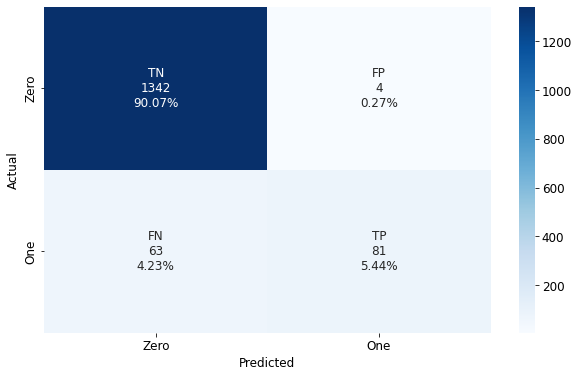

In [44]:
# confirmation matrix with threshold = 0.6
conf_mat(model, X_test, y_test, threshold = 0.6)

## 4.5 Logistic Regression Model - Conclusion

We would select the threshold = 0.6. (instead of default 0.5) for the Logistic Regression Model considering the business objective, even though recall has slightly degraded

## 5.0 Model building - Decision Tree

## 5.1 Decision Tree (without pruning)- Data preparation & checking the split

In [45]:
# lets take the data we copied from original dataframe and run some sanity checks first
df_dt.info();print('*'*50);print(f'No of duplicated rows {df_dt.duplicated().sum()}'); df_dt.sample(8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4987 non-null   int64  
 1   Experience          4987 non-null   int64  
 2   Income              4987 non-null   int64  
 3   Family              4987 non-null   int64  
 4   CCAvg               4987 non-null   float64
 5   Education           4987 non-null   int64  
 6   Mortgage            4987 non-null   int64  
 7   Personal_Loan       4987 non-null   int64  
 8   Securities_Account  4987 non-null   int64  
 9   CD_Account          4987 non-null   int64  
 10  Online              4987 non-null   int64  
 11  CreditCard          4987 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 635.5 KB
**************************************************
No of duplicated rows 0


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4206,48,23,29000,1,1300.0,2,0,0,0,0,0,0
57,56,31,131000,2,1200.0,3,0,1,0,0,0,0
3854,31,6,83000,4,1800.0,3,0,0,0,0,1,0
1068,34,9,105000,3,1200.0,3,0,0,1,0,0,0
4106,48,22,54000,1,1200.0,2,0,0,0,0,0,0
4811,36,12,123000,2,3000.0,3,0,1,0,0,0,0
2019,43,17,44000,1,200.0,1,0,0,1,1,1,0
614,37,12,180000,1,8600.0,1,0,0,0,0,1,1


Unlike logistic regression, there is no need to scale down (for eg. the standard scaler we applied for logistic regression) features or too much concerned about outliers as Decision tree is not based on distance based algorithm, 
and should catch the extreme range as it draws boundary 

Since all columns are already numerical types, we can already move to building a decision tree
    

In [46]:
# decision tree packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = df_dt.drop('Personal_Loan',axis=1)     
y = df_dt['Personal_Loan']   # Predicted class (Personal_Loan = 1=True/ Success, 0=False/ Not Success) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [47]:
print("Original Status True Values    : {0} ({1:0.2f}%)".format(len(df_dt.loc[df_dt['Personal_Loan'] == 1]), (len(df_dt.loc[df_dt['Personal_Loan'] == 1])/len(df_dt.index)) * 100))
print("Original Status False Values   : {0} ({1:0.2f}%)".format(len(df_dt.loc[df_dt['Personal_Loan'] == 0]), (len(df_dt.loc[df_dt['Personal_Loan'] == 0])/len(df_dt.index)) * 100))
print("")
print("Training Status True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Status False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Status True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Status False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Status True Values    : 480 (9.63%)
Original Status False Values   : 4507 (90.37%)

Training Status True Values    : 330 (9.46%)
Training Status False Values   : 3160 (90.54%)

Test Status True Values        : 150 (10.02%)
Test Status False Values       : 1347 (89.98%)



In [48]:
# 1. Initial Decision Tree Model (without any hyperparameter)
# create and fit the model to train
# in bid to produce the best outcome, this will generally produce a highly complex tree and overfitted model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## 5.2 Decision Tree (without pruning) performance evaluation

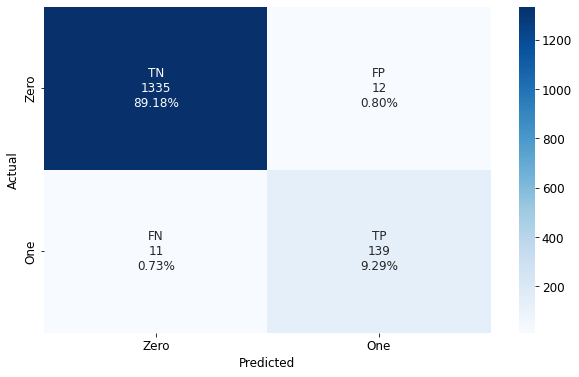

In [49]:
# lets check the confirmation matrix on the initial model
conf_mat(dTree, X_test, y_test)

In [50]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9846359385437542


In [51]:
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.9266666666666666


In [52]:
get_precision_score(dTree)

Precision on training set :  1.0
Precision on test set :  0.9205298013245033


In [53]:
get_f1_score(dTree)

f1_score on training set :  1.0
f1_score on test set :  0.9235880398671096


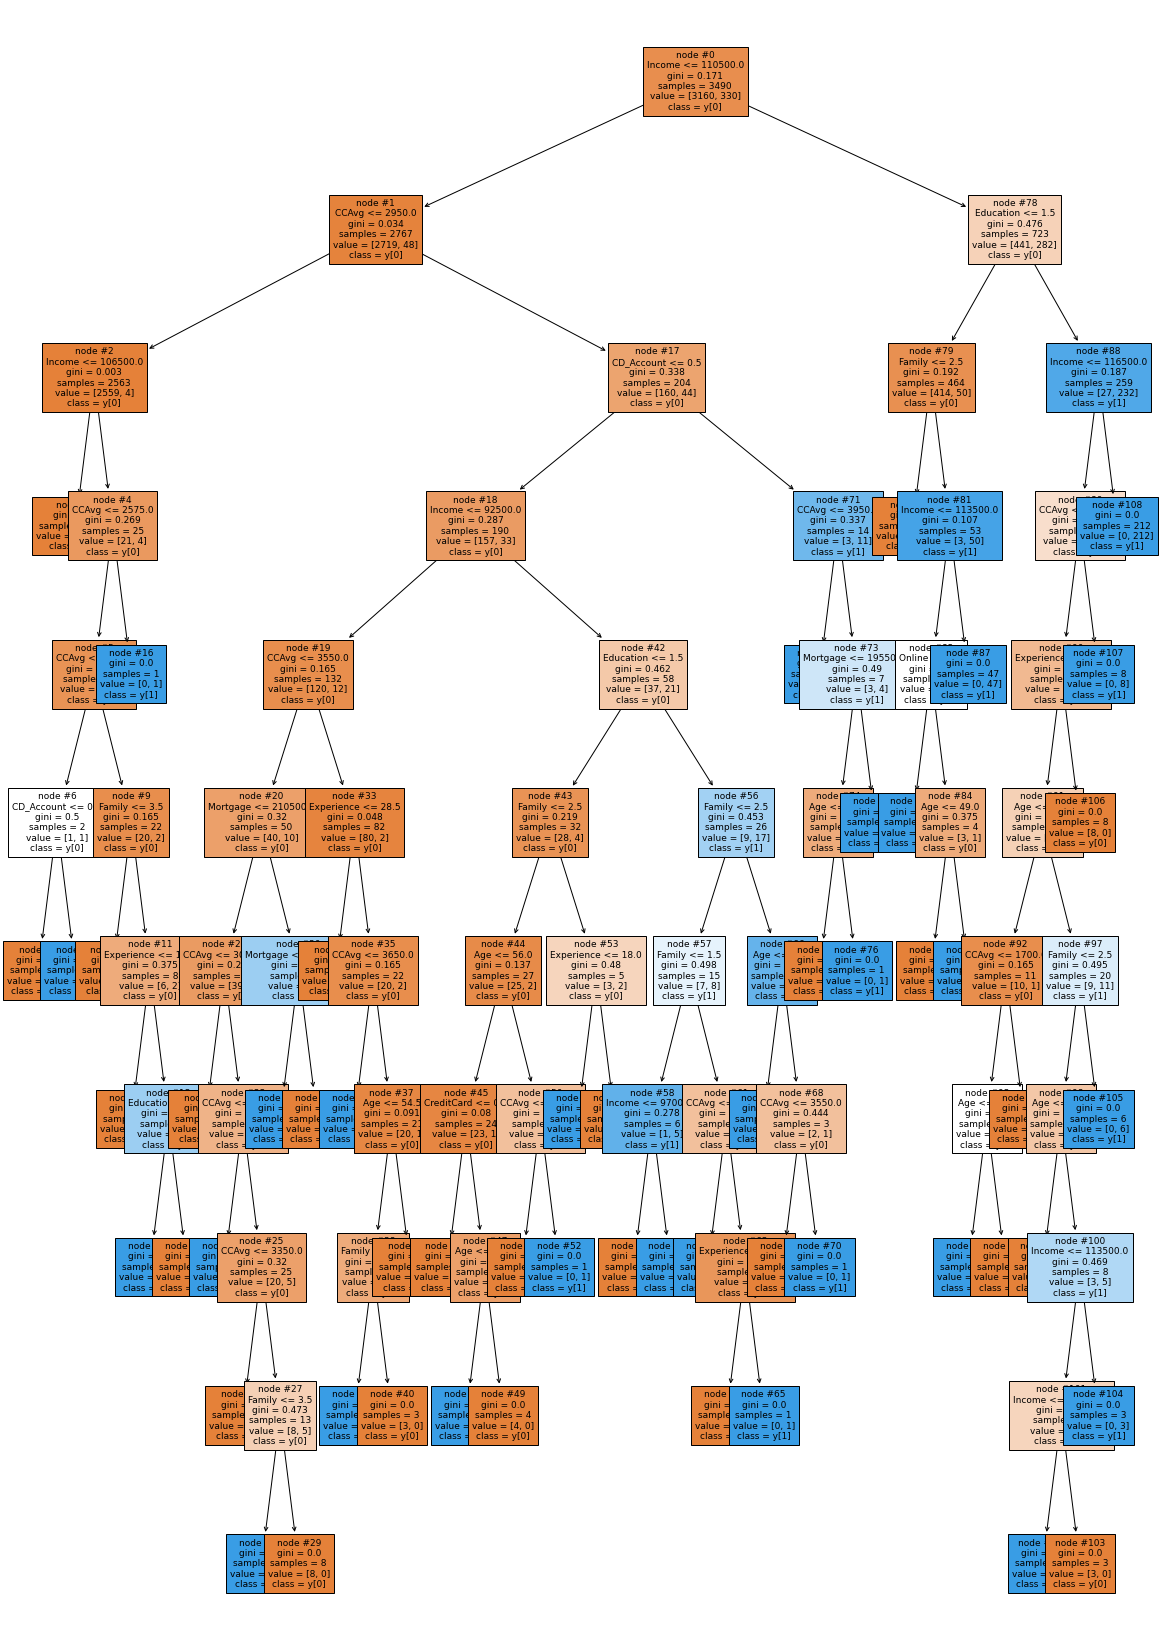

In [54]:
# lets publish the tree 
feature_names = list(X.columns)

plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [55]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 110500.00
|   |--- CCAvg <= 2950.00
|   |   |--- Income <= 106500.00
|   |   |   |--- weights: [2538.00, 0.00] class: 0
|   |   |--- Income >  106500.00
|   |   |   |--- CCAvg <= 2575.00
|   |   |   |   |--- CCAvg <= 750.00
|   |   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- CCAvg >  750.00
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |--- Experience <= 13.00
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  13.00
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- weight

In [56]:
# lets print fatures as Gini importance

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns 
                   ) .sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.361080
Income              0.334515
Family              0.165751
CCAvg               0.072961
Age                 0.023541
CD_Account          0.018020
Experience          0.013308
Mortgage            0.007785
Online              0.002510
CreditCard          0.000530
Securities_Account  0.000000


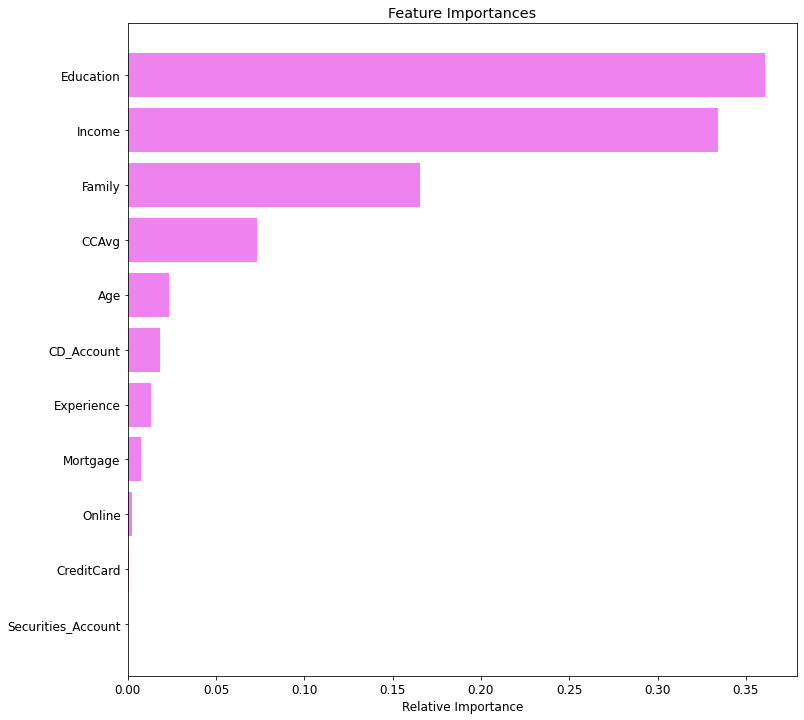

In [57]:
# a bar plot to show feature importance
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observation

- As observed, this is a highly overfitted and complex model
- Education, Income, Family are three most important features that influence this model

## 5.3 Decision Tree with Prepruning (Hyperparameters using GridSearchCV)

In [58]:
# we will use hyperparameters, but through GridSearch for finding optimized hyper parameters for pre pruning

from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=1)

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)  # we can use recall score here generally for comparision between models rather than accuracy

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

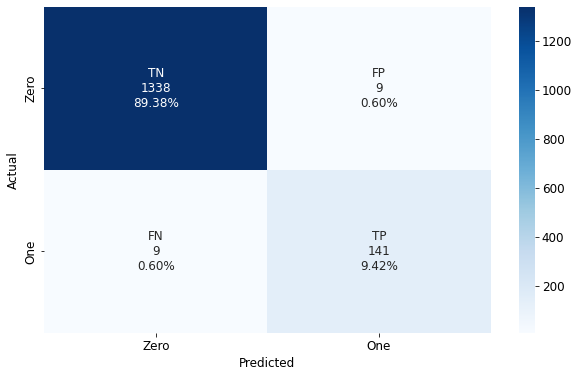

In [59]:
# confusion matrix with tuned parameters
conf_mat(estimator, X_test, y_test)

In [60]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

print('*'*50)
get_precision_score(estimator)

get_f1_score(estimator)

Accuracy on training set :  0.9865329512893983
Accuracy on test set :  0.9879759519038076
Recall on training set :  0.9030303030303031
Recall on test set :  0.94
**************************************************
Precision on training set :  0.952076677316294
Precision on test set :  0.94
f1_score on training set :  0.9269051321928462
f1_score on test set :  0.94


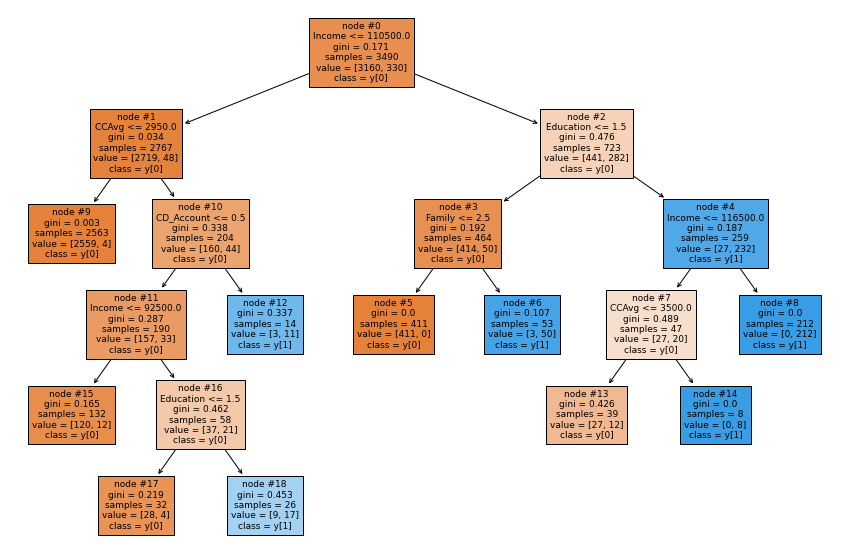

In [61]:
# visualizing the decision tree with Gridsearch and hyperparameters
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

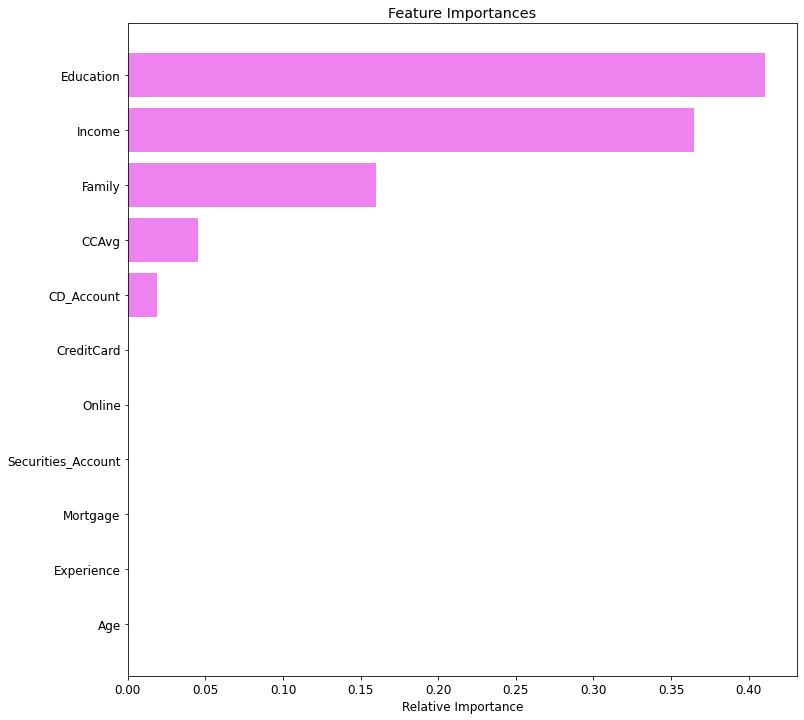

In [62]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observation
Pre pruning with identified hyper parameters already simplies the model a lot, and provides good performance on metrics also (FP has actually reduced in this model, comparing to the overfitted model on out of sample data)
- DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

Education, Income, Family are also the 3 top features in pruned model

## 5.4 Decision Tree with Post pruning using CC Alpha vs impurity

In [63]:
# generate a dataframe for ccp_alphas viz impurities
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [64]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000260,0.000521
2,0.000265,0.001582
3,0.000273,0.002128
4,0.000286,0.002700
5,0.000287,0.002987
6,0.000304,0.004205
7,0.000382,0.004587
8,0.000382,0.004969
9,0.000392,0.005753


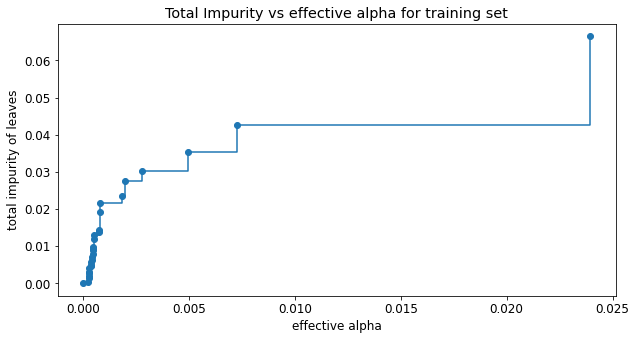

In [65]:
# plot the dataframe ccp_apha vs total impurity
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post") 
# leaving the last value from the ccp_alphas dataframe since that represnts single node
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


In [66]:
# create the list of models using training data and ccp_alphas from the dataframe
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
# remove the last item, since it represents a single node case


In [67]:
# using the list of newly created decision tree models (with train data), calculate the list of recall scores for train and test 
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=recall_score(y_train,pred_train3)
    recall_train.append(values_train)

recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=recall_score(y_test,pred_test3)
    recall_test.append(values_test)

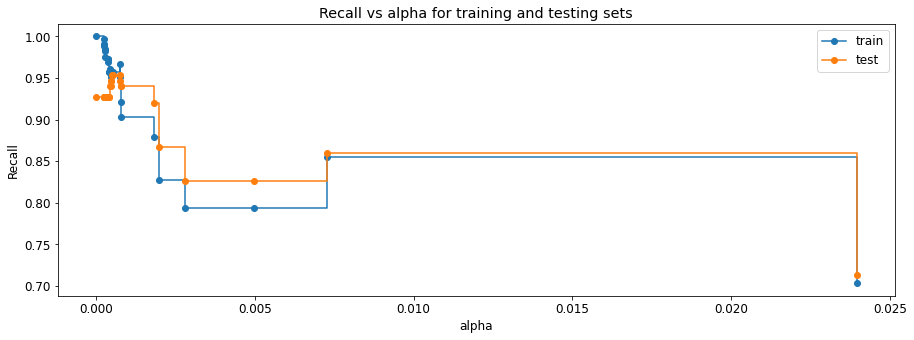

In [68]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [69]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0005053685569444881, random_state=1)


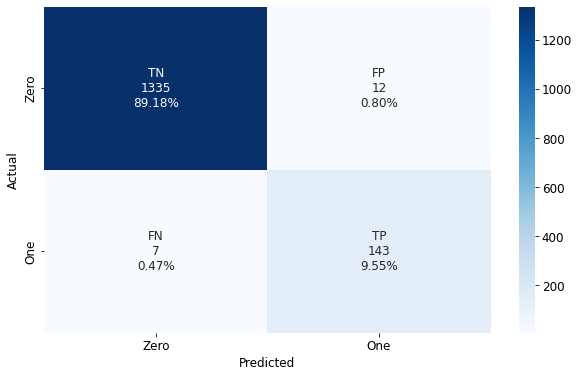

In [70]:
# lets now print out the scores, starting with confirmation matrix
conf_mat(best_model, X_test, y_test)

In [71]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9575757575757575
Recall on test set :  0.9533333333333334


In [72]:
get_precision_score(best_model)

Precision on training set :  0.9604863221884499
Precision on test set :  0.9225806451612903


In [73]:
get_f1_score(best_model)

f1_score on training set :  0.9590288315629742
f1_score on test set :  0.9377049180327869


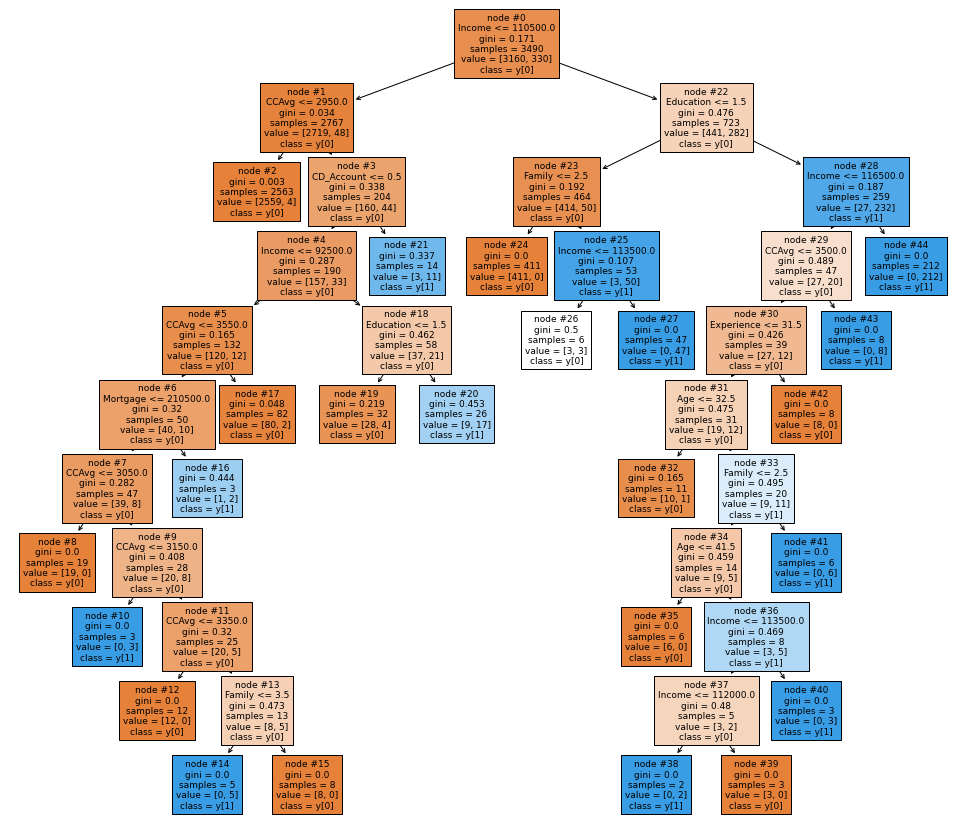

In [74]:
# visualizing the tree
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

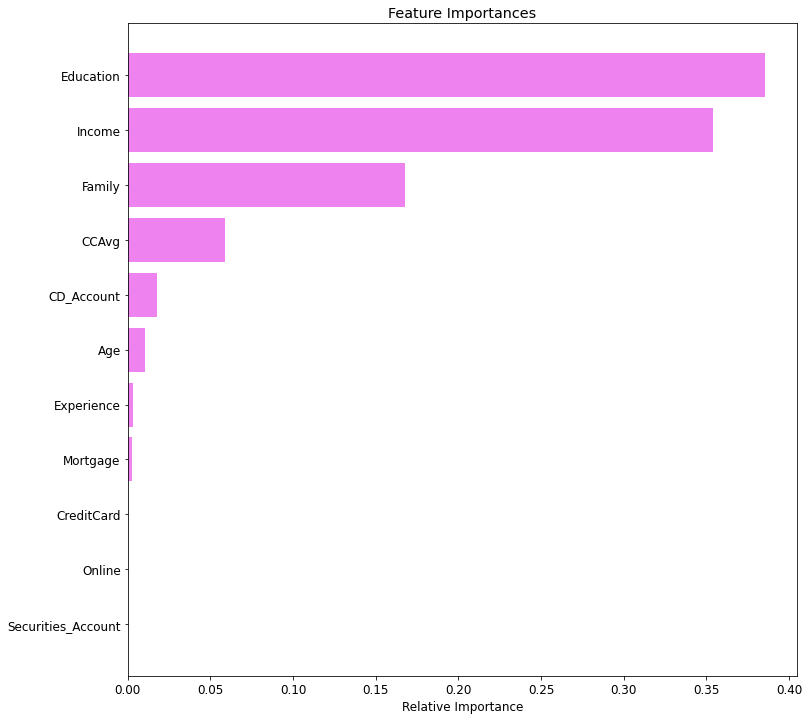

In [75]:
# publish feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observation
 - While this is less complex and less overfitted than the first model (without any pruning), 
    this is still a complex tree
    - Education, Income, Family are still 3 top features
 - Not to mention in complexity, but in terms of scoring too (FP is higher in this case), comparing to the pre pruned tree, pre pruned tree performs better with hyperparamter
     - DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                 min_impurity_decrease=0.001, random_state=1)




## 6.0 Actionable Insights - comparision between Logistic Regression and Decision Tree

- For this case, pre pruned decision tree was the most optimized model with hyper-parameter
    - Gini, DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
      min_impurity_decrease=0.001, random_state=1)
- Logistic Regression was closed second
    - when the optimization requirement was to {maximize TP, minimize FP}, logistic regression was not able to balance both better than pruned decision tree did
    - while changing the threshold to 0.6 did massively help reduce FP, but logistic regression couldnt maintain a high recall as the case would've demanded
    - for the optimzed tree (pruned tree), Education, Income, Family were the top 3 features
    - for the logistics regression, Education, CDAccount, Income were the top 3 features (followed by Family)
    - something to take care when considering manintenance or  deployment to ¨production,
        - generating the decision tree model was much easier since there was hardlyany data pre-processing that was required
        - generating the logistics model was relatively engaging since data pre processing was needed
    

## 7.0 Recommendations to business

1. Irrespective of the model chosen, the top 3 features business should target for Personal Loan success are Eductaion, Income, Family

2. Given the nature of data, income and mortgage, these will be highly skewed (right mostly), with possibilities of outlier, business should consider model that are resilient to those. Also the model should be resilient to multi collinearity. Given the nature of data here, it could be a challenge

3. Also, something to take care when considering manintenance or  deployment to ¨production
        - generating the decision tree model was much easier since there was hardly any data pre-processing that was required
        - generating the logistics model was relatively engaging since data pre processing was needed

4. For this problem, a pre pruned decision tree classifier with proposed hyper parameters is most suitable